In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 55s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [2]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

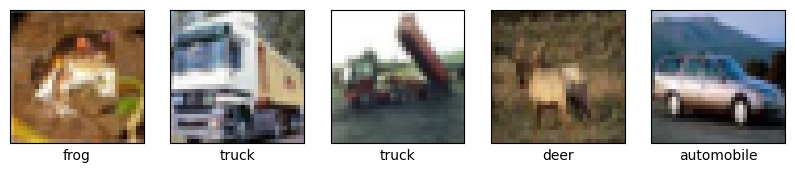

In [3]:
import matplotlib.pyplot as plt

# Display 5 sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.2970 - loss: 1.8947 - val_accuracy: 0.5104 - val_loss: 1.3854
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 72ms/step - accuracy: 0.4823 - loss: 1.4312 - val_accuracy: 0.5754 - val_loss: 1.2033
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 76ms/step - accuracy: 0.5439 - loss: 1.2858 - val_accuracy: 0.5954 - val_loss: 1.1767
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.5806 - loss: 1.1891 - val_accuracy: 0.6343 - val_loss: 1.0616
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.6011 - loss: 1.1335 - val_accuracy: 0.6438 - val_loss: 1.0241
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6264 - loss: 1.0713 - val_accuracy: 0.6539 - val_loss: 0.9816
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6429 - loss: 1.0218 - val_accuracy: 0.6619 - val_loss: 0.9573
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 72ms/step - accuracy: 0.6588 - loss: 0.9764 - 

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 4s - 11ms/step - accuracy: 0.6779 - loss: 0.9441
Test Accuracy: 0.6779


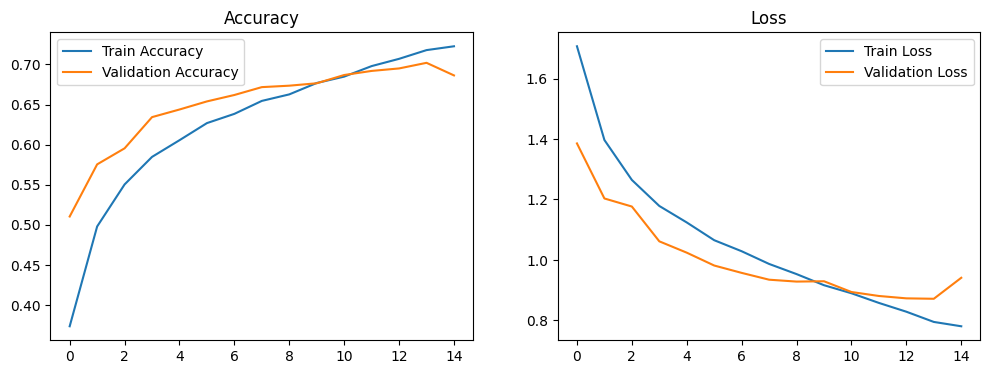

In [9]:
# Plot accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [10]:
# Predict labels for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


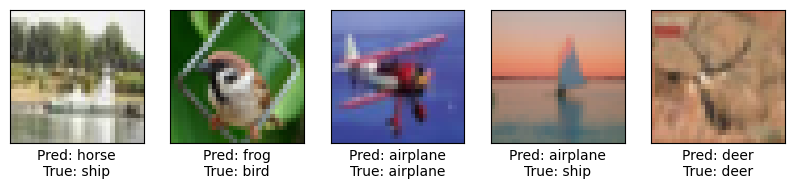

In [11]:
# Plot 5 random predictions
import random

indices = random.sample(range(len(x_test)), 5)

plt.figure(figsize=(10,2))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx])
    plt.xlabel(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_true[idx]]}")
plt.show()

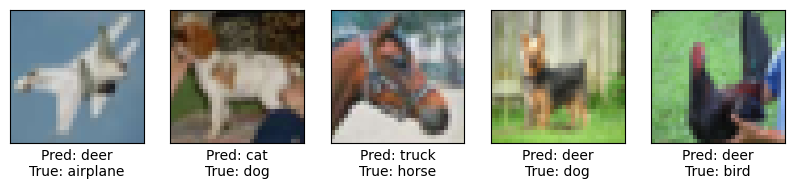

In [12]:
# Misclassified examples
misclassified_idx = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(10,2))
for i, idx in enumerate(misclassified_idx[:5]):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx])
    plt.xlabel(f"Pred: {class_names[y_pred_classes[idx]]}\nTrue: {class_names[y_true[idx]]}")
plt.show()

In [13]:
# Changing optimizer
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [17]:
from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create an ImageDataGenerator for training data with augmentation
datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Create an ImageDataGenerator for validation data (without augmentation)
datagen_val = ImageDataGenerator()

# Fit the generator to the training data
datagen_train.fit(x_train)

# Train the model using the augmented data
history = model.fit(datagen_train.flow(x_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=datagen_val.flow(x_val, y_val, batch_size=64))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 106ms/step - accuracy: 0.5967 - loss: 1.1586 - val_accuracy: 0.7598 - val_loss: 0.7027
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.6158 - loss: 1.1205 - val_accuracy: 0.7675 - val_loss: 0.6905
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.6189 - loss: 1.0956 - val_accuracy: 0.7475 - val_loss: 0.7356
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.6205 - loss: 1.0889 - val_accuracy: 0.7498 - val_loss: 0.7116
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.6280 - loss: 1.0745 - val_accuracy: 0.7537 - val_loss: 0.7095
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.6333 - loss: 1.0553 - val_accuracy: 0.7533 - val_loss: 0.7064
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.6357 - loss: 1.0483 - val_accuracy: 0.7366 - val_loss: 0.7480
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.6337 - loss: 1.0503 - val

In [18]:
from tensorflow.keras.regularizers import l2

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))

In [20]:
# Access the history object to get training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Get the final accuracy for training and validation
final_training_accuracy = training_accuracy[-1] * 100  # Convert to percentage
final_validation_accuracy = validation_accuracy[-1] * 100  # Convert to percentage

# Print the results
print(f"Training Accuracy: {final_training_accuracy:.2f}%")
print(f"Validation Accuracy: {final_validation_accuracy:.2f}%")

Training Accuracy: 65.57%
Validation Accuracy: 74.58%


### Insights and Conclusion

#### **Model Performance**

- **Training Accuracy:** 65.57%.
- **Validation Accuracy:** 74.58%.

- **Overfitting/Underfitting Analysis:**
  - From the accuracy and loss curves, it seems that the model might be **slightly overfitting**. This can be inferred if the training accuracy is much higher than the validation accuracy and the validation loss starts increasing after a certain number of epochs.
  - **Overfitting** occurs when the model learns too much from the training data, including noise, leading to poor generalization to new data. To address this, regularization techniques (like L2 regularization and Dropout) were applied.
  
- **CNN vs. Traditional ML Models:**
  - **CNNs** (Convolutional Neural Networks) are known to outperform traditional machine learning models like decision trees or SVMs when it comes to image classification. This is because CNNs are specifically designed to capture **spatial hierarchies** in images.
  - In contrast, traditional models don’t have an inherent mechanism to capture spatial relationships between pixels, which makes CNNs much more effective for image classification tasks.



**Advantages:**
1. **Automatic Feature Extraction:**
   - CNNs automatically learn features from the raw pixel data (such as edges, textures, shapes) without needing handcrafted features. This eliminates the need for extensive manual feature engineering.
   
2. **Works Well on Large Image Datasets:**
   - CNNs excel in environments where large amounts of image data are available, as they are capable of detecting complex patterns in large datasets. The deeper layers of CNNs can capture high-level features, making them highly effective for large image datasets like CIFAR-10 and MNIST.
   
3. **Translation Invariance:**
   - CNNs have the ability to recognize objects in an image regardless of their position. This **translation invariance** allows them to detect features that are shifted, rotated, or scaled within the image, which is crucial for real-world applications where objects might appear at different locations in images.

**Limitations:**
1. **Requires Large Training Data:**
   - One major limitation of CNNs is their need for a large amount of labeled data to perform well. For smaller datasets, CNNs may not generalize effectively and might suffer from overfitting despite regularization.
   
2. **Computationally Expensive:**
   - Training CNNs requires significant computational power due to the complexity of the model, especially as the depth of the network increases. It requires powerful hardware (e.g., GPUs) and longer training times.
   
3. **Sensitive to Adversarial Attacks:**
   - CNNs can be vulnerable to **adversarial attacks**, where small, carefully crafted changes to an input image can mislead the model into making incorrect predictions. This is a known issue in deep learning models and is an area of active research for improving model robustness.

